In [2]:
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Name: Jonah Zembower
# Date: March 10, 2025
# Project: EY 2025 Data Science Challenge
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Load Libraries and Data:

Importing the necessary libraries:

In [ ]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For the geodataframe
import geopandas as gpd
from shapely import wkt

# Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing the necessary datasets:

In [4]:
# Satellite Data:
all_bands_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_granular.csv")
all_bands_noisy_proximity = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_noisy_proximity.csv")
all_bands_proximity_noisy = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_noisy.csv")
all_bands_proximity_rounded_3 = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_rounded_3.csv")
all_bands_proximity_rounded_3_mapped = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\all_bands_proximity_rounded_3_mapped.csv")
indices_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\indices_granular.csv")
landsat_thermal_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\landsat_thermal_granular.csv")
noisy_long_lat_uhi = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Satellite Data\\noisy_long_lat_uhi.csv")

In [5]:
# Elevation Data:
building_elevation_granular = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_granular.csv")
building_elevation_nyc = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_nyc.csv")
building_elevation_proximity = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\Elevation\\building_elevation_proximity.csv")

In [6]:
# UHI Data:
proximity_uhi_train_long_lat = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\proximity_uhi_train_long_lat.csv")
rounded_mapped_uhi_train = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\rounded_mapped_uhi_train.csv")
rounded_uhi_train = pd.read_csv("C:\\Users\\jrzem\\OneDrive\\Desktop\\EY Dataset\\UHI\\rounded_uhi_train.csv")

In [11]:
rounded_mapped_uhi_train

,Unnamed: 0,Longitude,Latitude,UHI Index
0,0,-73.909167,40.813107,1.021634
1,1,-73.909187,40.813045,1.021634
2,2,-73.909215,40.812978,1.021634
3,3,-73.909242,40.812908,1.021634
4,4,-73.909257,40.812845,1.021634
...,...,...,...,...
11224,11224,-73.957050,40.790333,0.977064
11225,11225,-73.957063,40.790308,0.977064
11226,11226,-73.957093,40.790270,0.977064
11227,11227,-73.957112,40.790253,0.977064


# EDA:

In [8]:
all_bands_proximity_rounded_3_mapped

,Unnamed: 0,Longitude,Latitude,datetime,UHI Index,BO1,BO2,BO3,BO4,BO5,BO6,BO7,BO8,B8A,B11,B12
0,0,-73.909167,40.813107,24-07-2021 15:53,1.030289,924.863636,821.761364,953.176136,970.869318,1252.869318,1699.982955,1874.482955,1828.482955,1935.215909,1659.511364,1299.664773
1,1,-73.909187,40.813045,24-07-2021 15:53,1.030289,924.863636,821.761364,953.176136,970.869318,1252.869318,1699.982955,1874.482955,1828.482955,1935.215909,1659.511364,1299.664773
2,2,-73.909215,40.812978,24-07-2021 15:53,1.023798,924.863636,821.761364,953.176136,970.869318,1252.869318,1699.982955,1874.482955,1828.482955,1935.215909,1659.511364,1299.664773
3,3,-73.909242,40.812908,24-07-2021 15:53,1.023798,924.863636,821.761364,953.176136,970.869318,1252.869318,1699.982955,1874.482955,1828.482955,1935.215909,1659.511364,1299.664773
4,4,-73.909257,40.812845,24-07-2021 15:53,1.021634,924.863636,821.761364,953.176136,970.869318,1252.869318,1699.982955,1874.482955,1828.482955,1935.215909,1659.511364,1299.664773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11224,11224,-73.957050,40.790333,24-07-2021 15:57,0.972470,446.572115,544.557692,721.605769,556.644231,992.778846,2637.403846,3154.456731,3225.423077,3390.644231,1938.687500,1068.687500
11225,11225,-73.957063,40.790308,24-07-2021 15:57,0.972470,446.572115,544.557692,721.605769,556.644231,992.778846,2637.403846,3154.456731,3225.423077,3390.644231,1938.687500,1068.687500
11226,11226,-73.957093,40.790270,24-07-2021 15:57,0.981124,446.572115,544.557692,721.605769,556.644231,992.778846,2637.403846,3154.456731,3225.423077,3390.644231,1938.687500,1068.687500
11227,11227,-73.957112,40.790253,24-07-2021 15:59,0.981245,446.572115,544.557692,721.605769,556.644231,992.778846,2637.403846,3154.456731,3225.423077,3390.644231,1938.687500,1068.687500


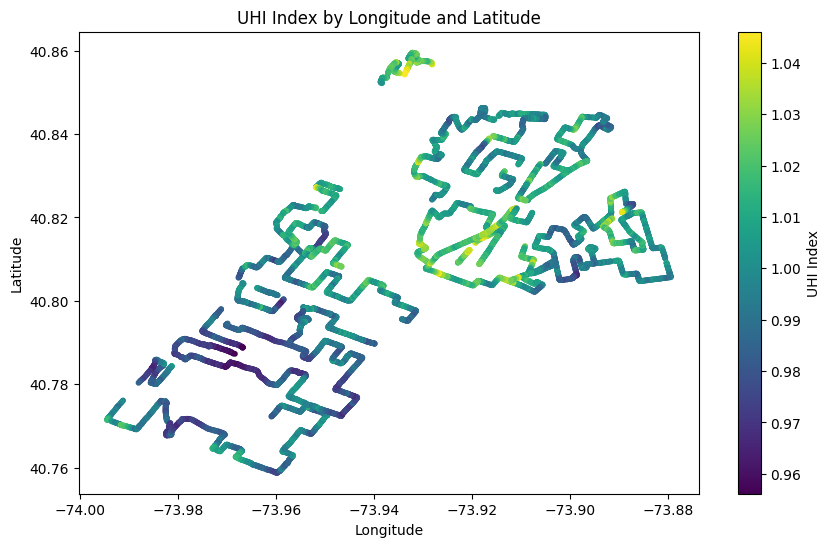

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(all_bands_proximity_rounded_3_mapped['Longitude'], all_bands_proximity_rounded_3_mapped['Latitude'], c=all_bands_proximity_rounded_3_mapped['UHI Index'], cmap='viridis', s=10)
plt.colorbar(label='UHI Index')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('UHI Index by Longitude and Latitude')
plt.show()

# Neural Network Models:

1. The first model we will perform is the all bands, 3 decimal place. This model performed best in our random forest regressor method.
2. The second model we will perform is certain bands with the elevation data.
3. The next model we will perform is the bands, elevation, and socioeconomic data. 

## All Bands, 3 Decimal Place:

#### Train the Model (All Bands, 3 Decimal Place):

#### Test the Model (All Bands, 3 Decimal Place):